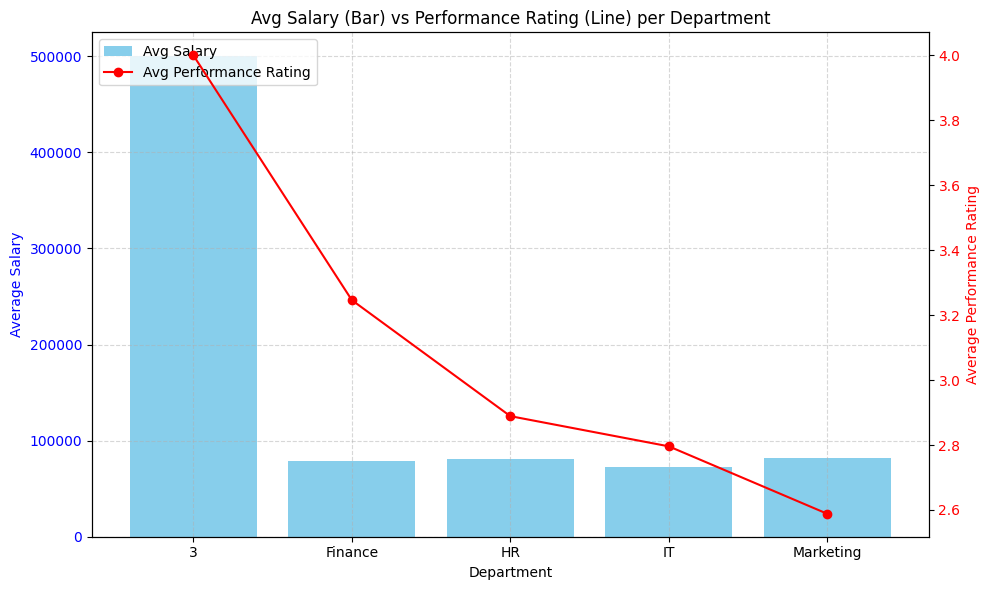

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('employees_data.csv')

# Group by department
grouped = df.groupby('department').agg({
    'salary': 'mean',
    'performance_rating': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart (average salary)
bar = ax1.bar(grouped['department'], grouped['salary'], color='skyblue', label='Avg Salary')
ax1.set_ylabel('Average Salary', color='blue')
ax1.set_xlabel('Department')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart (performance rating)
ax2 = ax1.twinx()
line = ax2.plot(grouped['department'], grouped['performance_rating'], color='red', marker='o', label='Avg Performance Rating')
ax2.set_ylabel('Average Performance Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and grid
plt.title('Avg Salary (Bar) vs Performance Rating (Line) per Department')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legends
lines_labels = [bar, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.tight_layout()
plt.show()
